In [1]:
#first we'd import our usuals :
import pandas as pd
import numpy as np
from pandas import Series , DataFrame
from numpy.random import randn

In [2]:
#next we import some useful data visual. tool:
from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
covid_data = pd.read_csv('covid_data.csv', sep = ',')


covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.671280e+05,3.949140e+05,3.936840e+05,3.444490e+05,395299.000000,394069.000000,367128.000000,394914.000000,393684.000000,344449.000000,...,233777.000000,154704.000000,278885.000000,374418.000000,306223.000000,4.062430e+05,1.329000e+04,13290.000000,13290.000000,13290.000000
mean,7.697832e+06,8.323417e+03,8.349156e+03,9.176119e+04,74.565387,74.795081,117106.321779,126.727348,127.116489,939.108406,...,32.911540,50.791119,3.097468,73.708013,0.722526,1.293650e+08,5.592295e+04,9.789843,10.996888,1781.925909
std,4.537065e+07,2.339893e+05,8.823958e+04,4.641677e+05,1390.535809,521.815729,163705.707575,1509.167654,559.042367,1144.973991,...,13.572844,31.953469,2.548255,7.394264,0.148984,6.636652e+08,1.554634e+05,12.043989,24.549943,1990.069833
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.930000e+03,0.000000e+00,0.000000e+00,1.380000e+02,0.000000,0.000000,3137.474000,0.000000,0.000000,68.245000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.794250e+02,2.150000,-1.447500,125.162125
50%,8.255200e+04,0.000000e+00,1.428600e+01,1.422000e+03,0.000000,0.000000,35661.447000,0.000000,3.389000,439.672000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.848000e+03,8.150000,5.710000,1270.143100
75%,9.386380e+05,0.000000e+00,3.507140e+02,1.305400e+04,0.000000,3.429000,161584.796000,0.000000,61.386750,1515.600000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.909440e+04,15.040000,15.667500,2888.020925
max,7.755833e+08,4.423623e+07,6.319461e+06,7.050691e+06,103719.000000,14817.000000,771480.580000,240325.866000,34332.267000,6485.570000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,382.860000,10293.515000


In [17]:
covid_data_numeric = covid_data.select_dtypes(include=[float,int])

covid_data_numeric.fillna(0)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406238,266362.0,0.0,0.0,5740.0,0.0,0.0,16320.662,0.0,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
406239,266362.0,0.0,0.0,5740.0,0.0,0.0,16320.662,0.0,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
406240,266362.0,0.0,0.0,5740.0,0.0,0.0,16320.662,0.0,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
406241,266362.0,0.0,0.0,5740.0,0.0,0.0,16320.662,0.0,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


C:\Users\HP\anaconda3\a4\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: Unknown format code 'd' for object of type 'float'

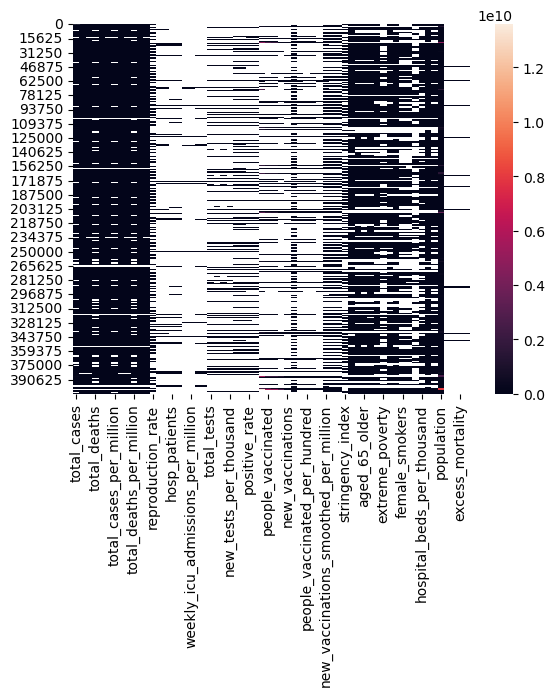

In [13]:
sns.heatmap(covid_data_numeric, annot = True, fmt = 'd')

In [14]:
covid_int = covid_data.select_dtypes(include=[int])

covid_int

""
0
1
2
3
4
...
406238
406239
406240
406241
